## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('Alexa_Command.csv')

## Displaying 25 Sample Data 

In [3]:
df.sample(frac=1).head(25)

,Number,Category,Action_needed,Question,Subcategory,Action,Time,Sentence
428,429,weather,1,1,myplace,none,minute,Am I going to get wet if I go outside in a few...
527,528,heating,1,1,livingroom,on,minute,Can you turn on the heating in the living room...
546,547,shutters,1,0,cellar,up,now,Raise the shutters in the cellar.
187,188,direction,1,1,home,none,now,How long before I will be home?
283,284,information,1,0,toilet,none,minute,I want info from the toilet in 8 minutes.
193,194,direction,1,1,myplace,none,now,Where is the nearest bus stop?
244,245,information,1,1,none,none,now,What is the temperature in the room?
210,211,direction,1,1,myplace,none,now,Should I use the public transport now?
591,592,toaster,1,0,livingroom,off,day,Power down the toaster in the living room in a...
559,560,shutters,1,0,kitchen,down,now,It is too bright in the kitchen.


## Removing Number column

In [4]:
del df['Number']

In [5]:
df.head()

,Category,Action_needed,Question,Subcategory,Action,Time,Sentence
0,lights,1,0,kitchen,on,today,Illuminate the kitchen today.
1,lights,1,0,kitchen,on,tomorrow,Illuminate the kitchen tomorrow.
2,lights,1,0,kitchen,on,hour,Turn on the light in the kitchen in 10 hours.
3,lights,1,0,kitchen,on,day,Turn on the light in the kitchen in 1 day.
4,lights,1,0,diningroom,on,today,Illuminate the dining room today.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       663 non-null    object
 1   Action_needed  663 non-null    int64 
 2   Question       663 non-null    int64 
 3   Subcategory    663 non-null    object
 4   Action         663 non-null    object
 5   Time           663 non-null    object
 6   Sentence       663 non-null    object
dtypes: int64(2), object(5)
memory usage: 36.4+ KB


In [7]:
df.shape

(663, 7)

In [8]:
df.columns

Index(['Category', 'Action_needed', 'Question', 'Subcategory', 'Action',
       'Time', 'Sentence'],
      dtype='object')

<AxesSubplot:xlabel='Category', ylabel='count'>

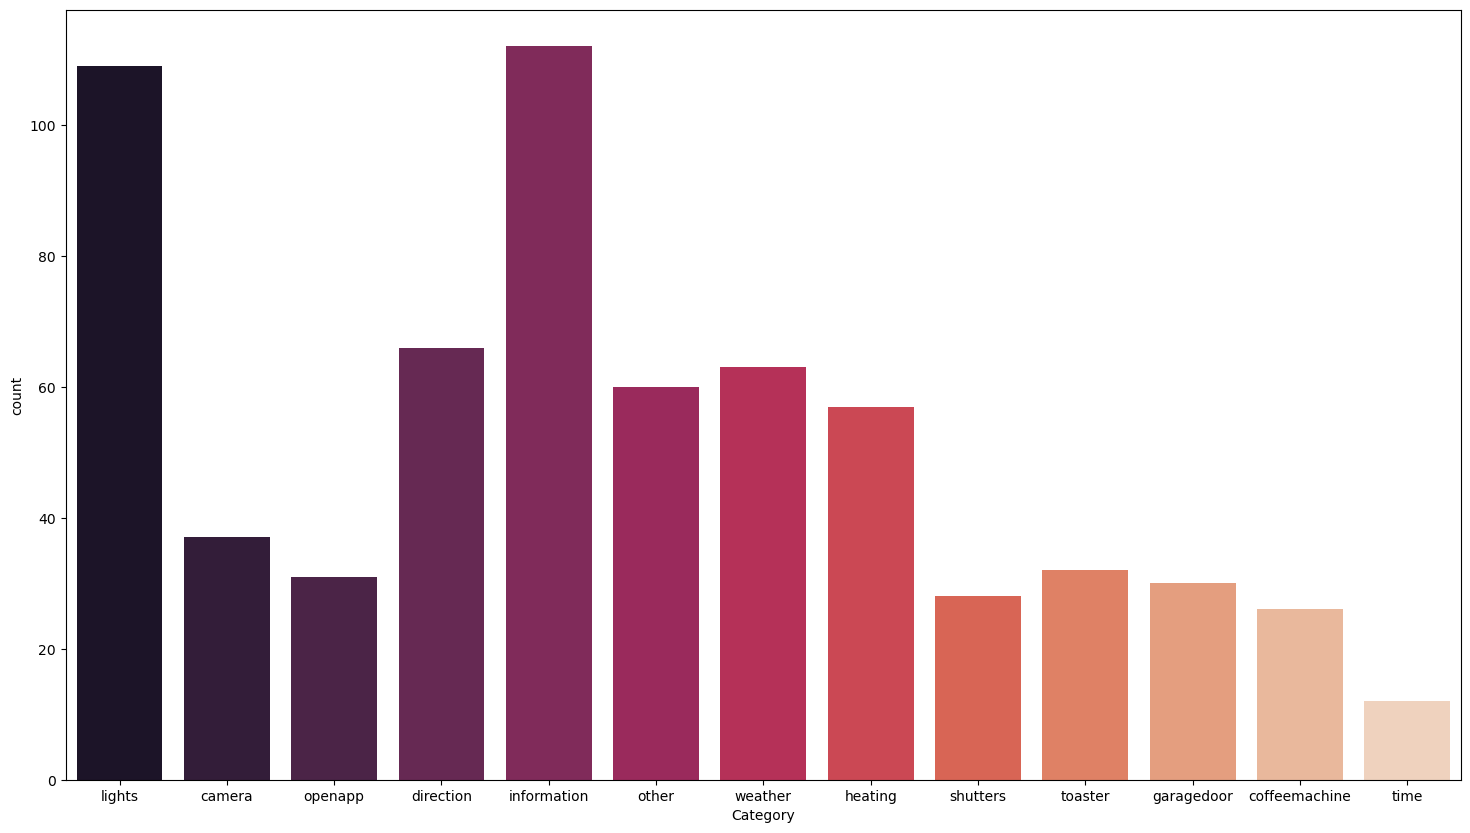

In [9]:
plt.figure(figsize=(18,10))
sns.countplot(x="Category", palette="rocket", data=df)

## Check for any null values in the dataset

In [10]:
df.isna().sum()

Category         0
Action_needed    0
Question         0
Subcategory      0
Action           0
Time             0
Sentence         0
dtype: int64

<AxesSubplot:xlabel='Subcategory', ylabel='count'>

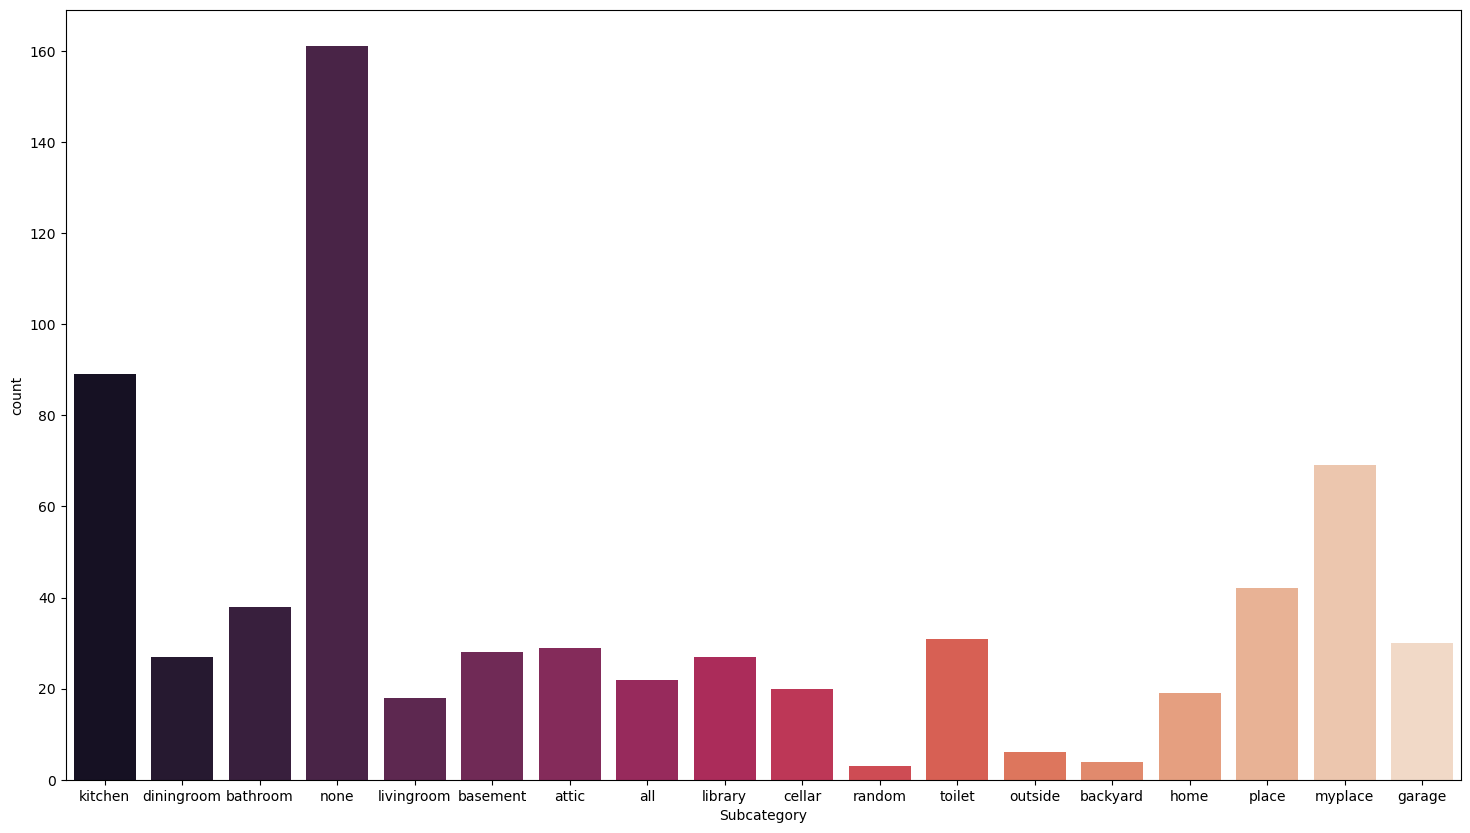

In [11]:
plt.figure(figsize=(18,10))
sns.countplot(x="Subcategory", palette="rocket", data=df)

In [12]:
df['Category'].unique()

array(['lights', 'camera', 'openapp', 'direction', 'information', 'other',
       'weather', 'heating', 'shutters', 'toaster', 'garagedoor',
       'coffeemachine', 'time'], dtype=object)

In [13]:
df['Subcategory'].unique()

array(['kitchen', 'diningroom', 'bathroom', 'none', 'livingroom',
       'basement', 'attic', 'all', 'library', 'cellar', 'random',
       'toilet', 'outside', 'backyard', 'home', 'place', 'myplace',
       'garage'], dtype=object)

In [14]:
df['Action'].unique()

array(['on', 'none', 'off', 'open', 'down', 'up'], dtype=object)

<AxesSubplot:xlabel='Question', ylabel='count'>

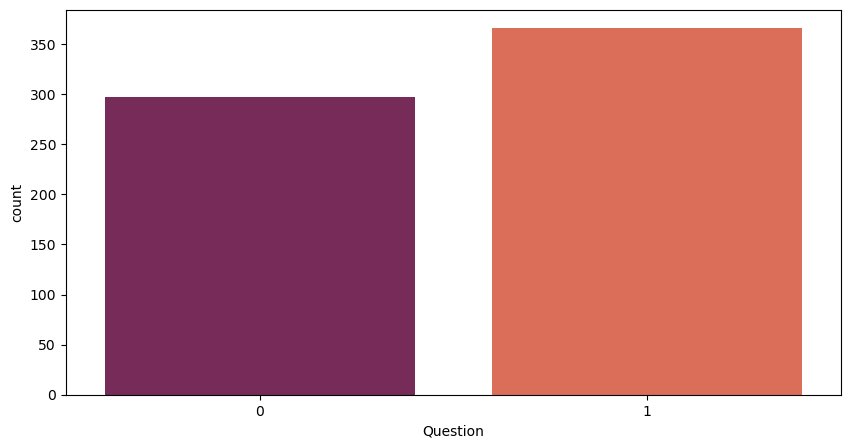

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x="Question", palette="rocket", data=df)

<AxesSubplot:xlabel='Action_needed', ylabel='count'>

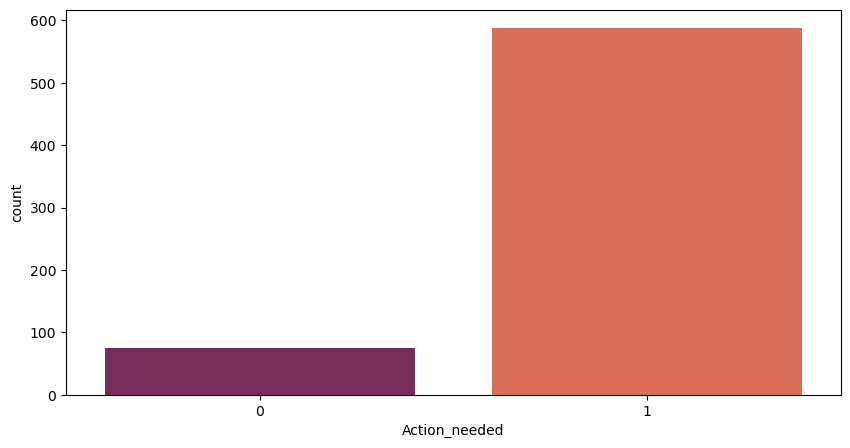

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x="Action_needed", palette="rocket", data=df)

<AxesSubplot:xlabel='Time', ylabel='count'>

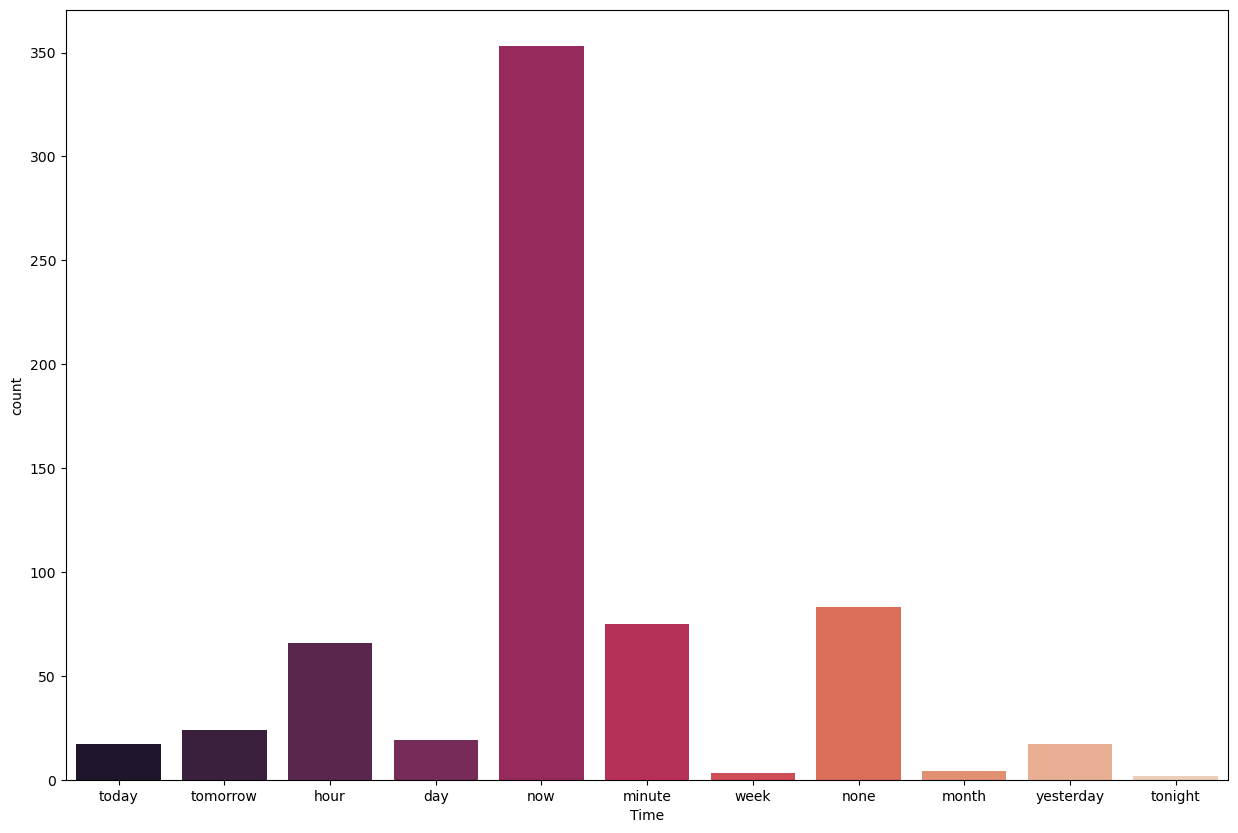

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x="Time", palette="rocket", data=df)

<AxesSubplot:xlabel='Action', ylabel='count'>

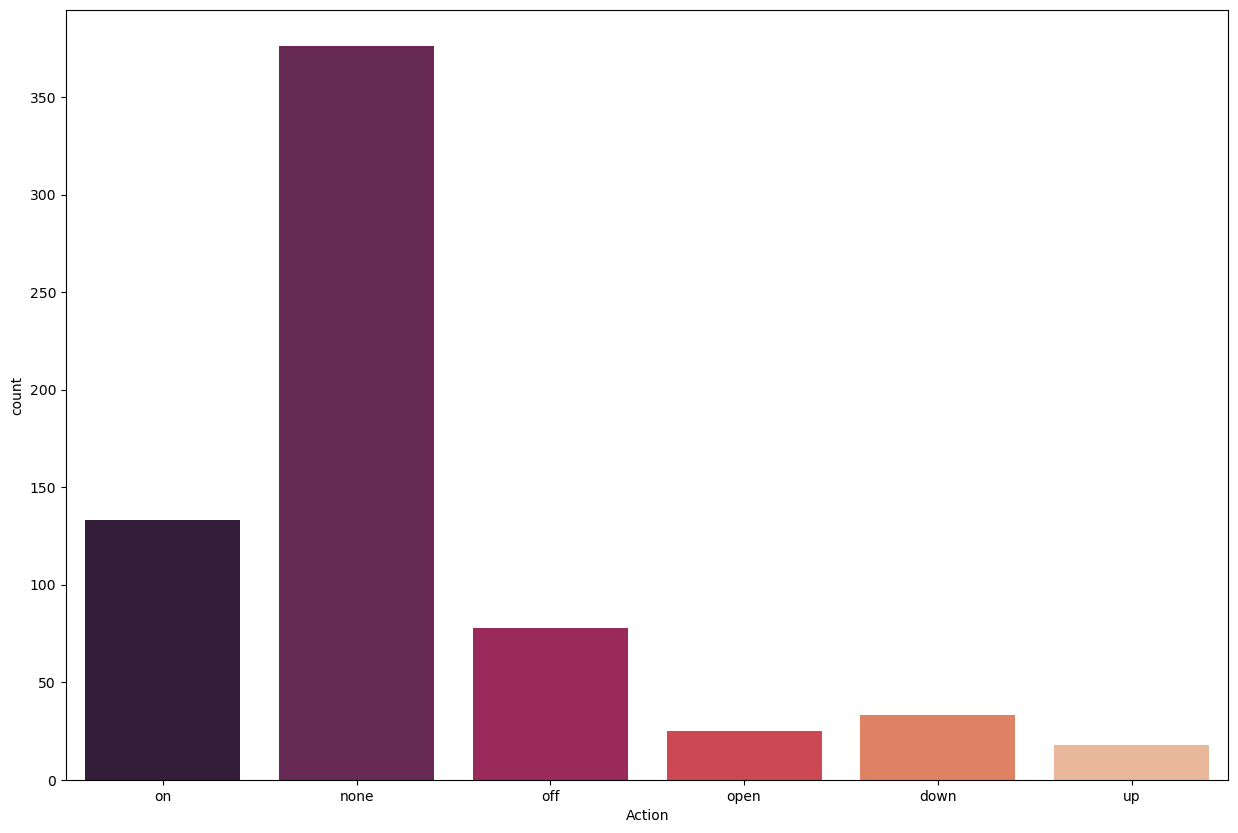

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x="Action", palette="rocket", data=df)

## Importing NLP Libraries for text-preprocessing

In [19]:
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
import itertools
import math

In [20]:
sentences = df['Sentence']
categories = df['Category']
subcategories = df['Subcategory']
actions = df['Action']

In [21]:
uniquecategories = list(set(categories))
uniquesubcategories = list(set(subcategories))
uniqueactions = list(set(actions))

## Tokenization

In [22]:
mergesentences = list(itertools.chain.from_iterable([word_tokenize(sentence.lower()) for sentence in sentences]))
vocabulary = list(set(mergesentences))

In [23]:
print(vocabulary)

['and', 'should', 'room', 'from', 'past', 'more', 'rooms', 'human', 'happy', 'islands', 'transport', 'toilet', 'pixels', 'have', 'adam', 'use', 'relay', 'falls', 'does', 'language', 'trump', 'toaster', 'coffeemachine', 'this', 'strange', 'the', 'camera', 'anything', 'a', 'sensors', 'life', 'tell', 'other', 'sixteen', 'temperature', '2', 'republican', 'tall', 'time', 'outside', 'busses', 'warm', 'drowning', 'exist', 'antwerp', 'operation', 'has', 'raise', 'storming', 'malidives', 'backyard', 'malfunctions', 'machine', 'antwerpen', "n't", 'weeks', 'bored', 'nothing', 'can', 'hard', 'so', 'doing', 'brussels', 'please', 'written', 'below', 'or', 'rises', 'something', 'trains', 'if', 'shown', 'random', 'myplace', 'let', '4', 'ten', 'week', 'ready', 'strangers', 'premier', 'toast', 'know', 'enlighten', 'water', 'tot', 'go', 'stupid', '112', 'justin', 'installed', 'drug', 'day', 'mallorca', 'shut', 'democrat', 'all', 'few', '10', 'favor', 'far', 'mouth', 'do', 'climbs', 'oceans', 'maps', 'own

In [24]:
# calculates how often the word appears in the sentence
def term_frequency(word, sentence):
    return sentence.split().count(word)

In [25]:
# calculates how often the word appears in the entire vocabulary
def document_frequency(word):
    return vocabulary.count(word)

In [26]:
# will make sure that unimportant words such as "and" that occur often will have lower weights
# log taken to avoid exploding of IDF with words such as 'is' that can occur a lot
def inverse_document_frequency(word):
    return math.log(len(vocabulary) / (document_frequency(word) + 1))

In [27]:
# get term frequency inverse document frequency value
def calculate_tfidf(word, sentence):
    return term_frequency(word, sentence) * inverse_document_frequency(word)

In [28]:
# get one-hot encoded vectors for the targets
def one_hot_class_vector(uniqueclasses, w):
    emptyvector = [0 for i in range(len(uniqueclasses))]
    emptyvector[uniqueclasses.index(w)] = 1
    return emptyvector

In [29]:
# get one-hot encoded vectors for the words
def one_hot_vector(w):
    emptyvector = [0 for i in range(len(vocabulary))]
    emptyvector[vocabulary.index(w)] = 1
    return emptyvector

In [30]:
# get one-hot encdoded sentence vector
def sentence_vector(sentence, tfidf=False):
    tokenizedlist = word_tokenize(sentence.lower())
    sentencevector = [0 for i in range(len(vocabulary))]
    count = 0

    for word in tokenizedlist:
        if word in vocabulary:
            count = count + 1
            if tfidf:
                sentencevector = [x + y for x, y in zip(sentencevector, [e * calculate_tfidf(word, sentence) for e in one_hot_vector(word)])] 
            else:
                sentencevector = [x + y for x, y in zip(sentencevector, one_hot_vector(word))]

    if count == 0:
        return sentencevector
    else:
        return [(el / count) for el in sentencevector]

In [31]:
# wordvectors = [one_hot_vector(w) for w in vocabulary] # not needed
categoryvectors = [cv.index(1) for cv in [one_hot_class_vector(uniquecategories, w) for w in categories]]
subcategoryvectors = [cv.index(1) for cv in [one_hot_class_vector(uniquesubcategories, w) for w in subcategories]]
actionvectors = [cv.index(1) for cv in [one_hot_class_vector(uniqueactions, w) for w in actions]]
sentencevectors = [sentence_vector(sentence) for sentence in sentences]
sentencevectorstfidf = [sentence_vector(sentence, True) for sentence in sentences]

## Splitting of Data into train and test set of different columns

In [32]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(sentencevectors, categoryvectors, test_size=0.25, random_state=42)
X_train_cat_tfidf, X_test_cat_tfidf, y_train_cat_tfidf, y_test_cat_tfidf = train_test_split(sentencevectorstfidf, categoryvectors, test_size=0.25, random_state=42)
X_train_subcat, X_test_subcat, y_train_subcat, y_test_subcat = train_test_split(sentencevectors, subcategoryvectors, test_size=0.25, random_state=42)
X_train_action, X_test_action, y_train_action, y_test_action = train_test_split(sentencevectors, actionvectors, test_size=0.25, random_state=42)

## Importing Different Classifier Models

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score
from numpy import random
random.seed(69)

In [34]:
def train_fit(model_name, model, X, y, X_test, y_test):
    model.fit(X, y)
    y_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)
    print(f"{model_name}: {accuracy}")
    return model

## Random Forest

In [35]:
random_forest_model = RandomForestClassifier()
random_forest_model = train_fit("RandomForestClassifier", random_forest_model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

RandomForestClassifier: 0.891566265060241


## SVC

In [36]:
svc_model_linear = SVC(kernel='linear', decision_function_shape='ovo')
svc_model_linear = train_fit("SVC (linear)", svc_model_linear, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

svc_model_rbf = SVC(kernel='rbf', decision_function_shape='ovo')
svc_model_rbf = train_fit("SVC (rbf)", svc_model_rbf, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

SVC (linear): 0.536144578313253
SVC (rbf): 0.8674698795180723


## XGB

In [37]:
xgb_model = xgb.XGBClassifier()
xgb_model = train_fit("XGBClassifier", xgb_model, np.array(X_train_cat), np.array(y_train_cat), X_test_cat, y_test_cat)

XGBClassifier: 0.8674698795180723


## CatBoost

In [38]:
catboost_model = CatBoostClassifier(verbose=False)
catboost_model = train_fit("CatBoostClassifier", catboost_model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

CatBoostClassifier: 0.927710843373494


## MLP

In [39]:
mlp_model = MLPClassifier()
mlp_model = train_fit("MLPClassifier", mlp_model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

MLPClassifier: 0.8855421686746988


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## LGBM

In [40]:
lgbm_model = lgbm.LGBMClassifier()
lgbm_model = train_fit("LGBMClassifier", lgbm_model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

LGBMClassifier: 0.7168674698795181


## SVC linear cost

In [41]:
svc_linear_cost_model = SVC(kernel='linear', decision_function_shape='ovo', C=52)
svc_linear_cost_model = train_fit("SVC (linear) + cost", svc_linear_cost_model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

SVC (linear) + cost: 0.9096385542168675


## TPOT

In [42]:
tpot_model = TPOTClassifier(generations=5, population_size=5, cv=5, verbosity=3)
tpot_model = train_fit("TPOTClassifier", tpot_model, np.array(X_train_cat), np.array(y_train_cat), X_test_cat, y_test_cat)
tpot_model.export("tpot_pipeline.py")

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.

Generation 1 - Current Pareto front scores:

-1	0.7948686868686868	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.01, GradientBoostingClassifier__max_depth=7, GradientBoostingClassifier__max_features=1.0, GradientBoostingClassifier__min_samples_leaf=7, GradientBoostingClassifier__min_samples_split=15, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=1.0)

-2	0.8512323232323233	KNeighborsClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False), KNeighborsClassifier__n_neighbors=28, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=distance)

Generation 2 - Current Pareto front scores:

-1	0.7948686868686868	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.01, GradientBoostingClassifier__max_depth=7, GradientBoostingClassifier

In [43]:
mlp_max_iter_model_tfidf = MLPClassifier(max_iter=10000)
mlp_max_iter_model_tfidf = train_fit("MLPClassifier", mlp_max_iter_model_tfidf, X_train_cat_tfidf, y_train_cat_tfidf, X_test_cat_tfidf, y_test_cat_tfidf)

MLPClassifier: 0.8433734939759037


In [44]:
mlp_max_iter_model_cat = MLPClassifier(max_iter=10000)
mlp_max_iter_model_cat = train_fit("MLPClassifier", mlp_max_iter_model_cat, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
mlp_max_iter_model_subcat = MLPClassifier(max_iter=10000)
mlp_max_iter_model_subcat = train_fit("MLPClassifier", mlp_max_iter_model_subcat, X_train_subcat, y_train_subcat, X_test_subcat, y_test_subcat)
mlp_max_iter_model_action = MLPClassifier(max_iter=10000)
mlp_max_iter_model_action = train_fit("MLPClassifier", mlp_max_iter_model_action, X_train_action, y_train_action, X_test_action, y_test_action)

MLPClassifier: 0.9156626506024096
MLPClassifier: 0.8554216867469879
MLPClassifier: 0.8975903614457831


## Prediction of input text-data

In [45]:
def predict(model, classes, sentence):
    y_preds = model.predict([sentence_vector(sentence)])
    return classes[y_preds[0]]

In [46]:
sentence = "Hi Google, please turn off the lights."
print(predict(mlp_max_iter_model_cat, uniquecategories, sentence))
print(predict(mlp_max_iter_model_subcat, uniquesubcategories, sentence))
print(predict(mlp_max_iter_model_action, uniqueactions, sentence))

lights
none
off


In [47]:
sentence = "Turn the lights off in the kitchen."
print(predict(mlp_max_iter_model_cat, uniquecategories, sentence))
print(predict(mlp_max_iter_model_subcat, uniquesubcategories, sentence))
print(predict(mlp_max_iter_model_action, uniqueactions, sentence))

lights
kitchen
off


In [54]:
sentence = input("Enter any command: ")
print(predict(mlp_max_iter_model_cat, uniquecategories, sentence))
print(predict(mlp_max_iter_model_subcat, uniquesubcategories, sentence))
print(predict(mlp_max_iter_model_action, uniqueactions, sentence))

Enter any command: Tell me when the water in the bathroom is hot enough
information
bathroom
none


## Future Work
This model trained can be used with some sensors and iot devices to give the accurate numerical values of the actions. Like mini Alexa etc...